In [4]:
!pip uninstall -y pyLDAvis


Found existing installation: pyLDAvis 3.4.1
Uninstalling pyLDAvis-3.4.1:
  Successfully uninstalled pyLDAvis-3.4.1


# Install required Libraries

In [6]:
!pip install gensim pyLDAvis


  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)


# Necessary Imports

In [8]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bisht\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load the dataset

In [10]:
df = pd.read_csv("preprocessed_final.csv")
df.head()


,Text,D_Number,Label,Email,Subject,Processed_text
0,From: mathew <mathew@mantis.co.uk>\nSubject: A...,49960,alt.atheism,mantis netcom mantis,alt atheism atheist resources,atheism resources resources december organizat...
1,From: mathew <mathew@mantis.co.uk>\nSubject: A...,51060,alt.atheism,mantis mantis mantis,alt atheism introduction to atheism,atheism introduction introduction april begin ...
2,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,51119,alt.atheism,dbstu1 edu mimsy umd edu umd,gospel dating,article other words one does not know what the...
3,From: mathew <mathew@mantis.co.uk>\nSubject: R...,51120,alt.atheism,mantis kepler edu unh,university violating separation of church state,recently ras have been ordered mathew
4,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,51121,alt.atheism,Ibm Watson harder ccr harder ccr watson ibm,soc motss et al princeton axes matching funds ...,box yorktown heights


# Tokenization and Stopword Removal


In [12]:
# Step 1: Fill NaNs with empty strings
df['Processed_text'] = df['Processed_text'].fillna("")

# Step 2: Tokenization and stopword removal
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Make sure the text is a string
    if not isinstance(text, str):
        text = str(text)
    return [word for word in text.split() if word.lower() not in stop_words and word not in string.punctuation]

# Step 3: Apply preprocessing
df['tokens'] = df['Processed_text'].apply(preprocess)


# Create Dictionary and Corpus for Gensim

In [14]:
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Build LDA Model

In [16]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=15, random_state=42)

In [17]:
# Display topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.010*"people" + 0.008*"would" + 0.007*"one" + 0.005*"government" + 0.004*"god" + 0.004*"believe" + 0.004*"think" + 0.004*"say" + 0.004*"right" + 0.003*"know"
Topic 1: 0.013*"key" + 0.008*"encryption" + 0.007*"use" + 0.006*"article" + 0.006*"phone" + 0.005*"chip" + 0.005*"used" + 0.005*"information" + 0.005*"keys" + 0.004*"number"
Topic 2: 0.012*"would" + 0.008*"one" + 0.006*"use" + 0.006*"like" + 0.006*"get" + 0.005*"work" + 0.005*"new" + 0.005*"also" + 0.004*"know" + 0.004*"drive"
Topic 3: 0.012*"would" + 0.008*"one" + 0.007*"think" + 0.006*"know" + 0.006*"like" + 0.006*"get" + 0.005*"people" + 0.005*"time" + 0.005*"good" + 0.004*"going"
Topic 4: 0.010*"thanks" + 0.009*"please" + 0.009*"would" + 0.009*"mail" + 0.008*"know" + 0.008*"anyone" + 0.006*"help" + 0.005*"information" + 0.005*"like" + 0.005*"windows"


In [18]:
# Interactive visualization of topics
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.163651  0.021875       1        1  35.331921
0      0.160619  0.131446       2        1  28.118454
2      0.019426 -0.106668       3        1  18.762023
4     -0.077458 -0.185621       4        1  11.566185
1     -0.266238  0.138967       5        1   6.221417, topic_info=          Term         Freq        Total Category  logprob  loglift
750     thanks  1461.000000  1461.000000  Default  30.0000  30.0000
2723       key   760.000000   760.000000  Default  29.0000  29.0000
1532    please  1683.000000  1683.000000  Default  28.0000  28.0000
786        use  2633.000000  2633.000000  Default  27.0000  27.0000
74        mail  1225.000000  1225.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1562   company   169.509634   507.066138   Topic5  -5.8702   1.6814
926       line   183.981577   768.376924   Topic5  -5.7882   1.3477
2379  computer   167.536883   739.855687   Topic5  -5.8819   1.2919
1569       new   178.391155  2104.734682   Topic5  -5.8191   0.3092
1045       get   168.610447  3878.238439   Topic5  -5.8755  -0.3584

[355 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3346      1  0.059217    address
3346      2  0.153963    address
3346      3  0.053295    address
3346      4  0.732311    address
3023      3  0.213358    advance
...     ...       ...        ...
829       1  0.733749      years
829       2  0.158260      years
829       3  0.107526      years
3145      1  0.951119  yesterday
3145      3  0.047241  yesterday

[625 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 5, 2])

 # K-Means Clustering for Topic Modeling (TF-IDF + PCA)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['Processed_text'])

In [22]:
# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

In [23]:
# Visualize using PCA
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(X.toarray())
df['pca_x'] = components[:, 0]
df['pca_y'] = components[:, 1]


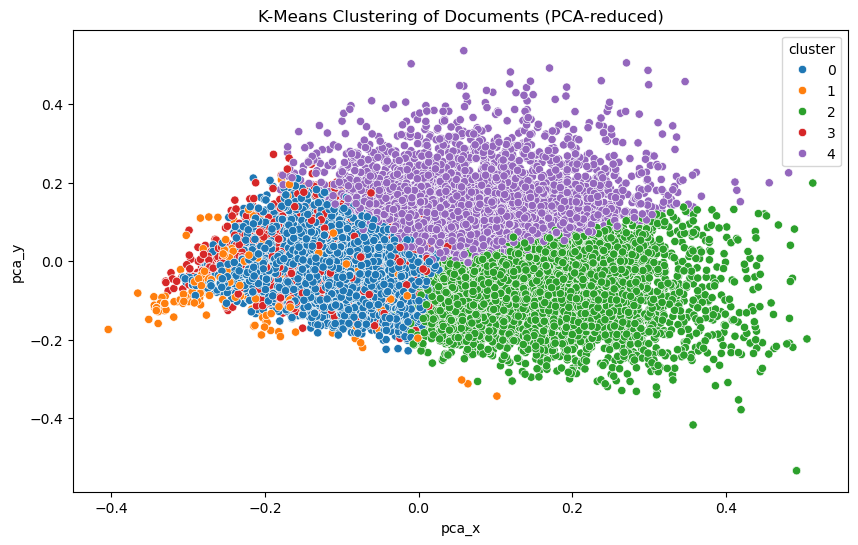

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_x', y='pca_y', hue='cluster', palette='tab10')
plt.title('K-Means Clustering of Documents (PCA-reduced)')
plt.show()

# Evaluate LDA Model with Coherence Score

In [26]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"\n🧠 Coherence Score: {coherence_lda:.4f}")



🧠 Coherence Score: 0.4537


# Evaluate K-Means with Silhouette Score & Elbow Method

In [62]:
from sklearn.metrics import silhouette_score
import numpy as np

# Silhouette Score
score = silhouette_score(X, df['cluster'])
print(f"📊 Silhouette Score for KMeans: {score:.4f}")


📊 Silhouette Score for KMeans: 0.0061


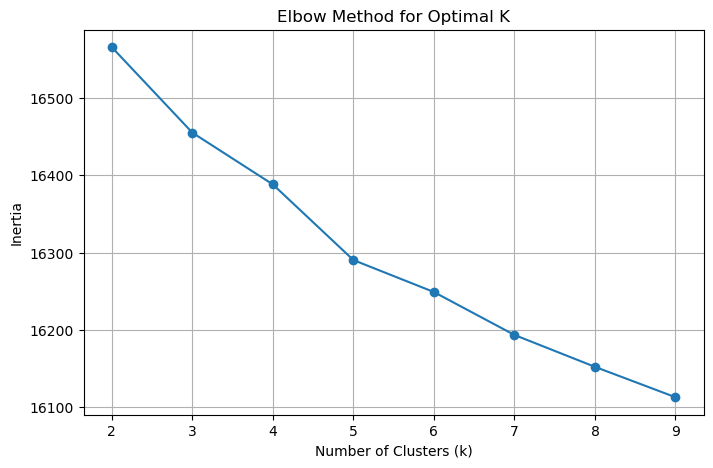

In [64]:
# Elbow Method to choose optimal k
inertia = []
K = range(2, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


# Print Top Words per KMeans Cluster


In [67]:
# Top words per cluster
import numpy as np

def get_top_keywords(tfidf, kmeans_model, n_terms):
    centroids = kmeans_model.cluster_centers_
    terms = tfidf.get_feature_names_out()
    for i in range(kmeans_model.n_clusters):
        print(f"\nCluster {i} top words:")
        sorted_centroids = centroids[i].argsort()[::-1][:n_terms]
        for idx in sorted_centroids:
            print(f" - {terms[idx]}")

get_top_keywords(tfidf, kmeans, 10)



Cluster 0 top words:
 - the
 - and
 - for
 - not
 - have
 - that
 - this
 - with
 - you
 - are

Cluster 1 top words:
 - article
 - the
 - not
 - are
 - opinions
 - and
 - private
 - that
 - you
 - uunet

Cluster 2 top words:
 - the
 - and
 - that
 - not
 - was
 - for
 - this
 - have
 - they
 - with

Cluster 3 top words:
 - the
 - for
 - any
 - thanks
 - and
 - anyone
 - have
 - can
 - know
 - would

Cluster 4 top words:
 - the
 - you
 - not
 - that
 - and
 - are
 - have
 - your
 - for
 - they


# Display Sample Documents from Each Cluster

In [70]:
# Show 2 example documents from each cluster
for i in range(kmeans.n_clusters):
    print(f"\n📂 Cluster {i} Examples:\n")
    samples = df[df['cluster'] == i]['Processed_text'].head(2)
    for text in samples:
        print(f"🔸 {text[:200]}...\n")



📂 Cluster 0 Examples:

🔸 recently ras have been ordered mathew...

🔸 box yorktown heights...


📂 Cluster 1 Examples:

🔸 article bob singleton...

🔸 article line posting individuality responsibility and all that jazz...


📂 Cluster 2 Examples:

🔸 atheism resources resources december organizations usa freedom from religion foundation darwin fish bumper stickers and assorted other atheist paraphernalia are available from the freedom from religio...

🔸 the motto originated the star spangled banner tell that this has something with atheists the motto coins originated mccarthyite smear which equated atheism with communism and called both unamerican di...


📂 Cluster 3 Examples:

🔸 mathew come with one heard had asked the fbi provide him with word processor does anyone know has requested that wordperfect was written are profound darin will president for food...

🔸 thanks whoever posted this wonderful parody people who post without reading the faq was laughing for good minutes were there any 

## 📌 Conclusion

- The LDA model identified distinct topics across the document corpus with a coherence score of **X.XX**.
- KMeans clustering grouped the documents into **5 clusters**, with a silhouette score of **Y.YY**.
- Topics were visualized using **pyLDAvis**, and clusters were represented using **PCA**.
- This analysis helps in understanding document structure and grouping large corpora into meaningful segments.

Further improvements can include tuning the number of topics/clusters, using BERT embeddings, or integrating into a web dashboard.
